<h2>BMIF201 Lecture 1 in-class problem set instructions</h2>

This ungraded in-class problemset is intended to be completed in assigned groups of 2-3 in class. All members of each group should type their own solutions, but the solutions can be exactly identical. Feel free to ask other groups, the TAs, or the professor for assistance. Your homework for this unit will build upon the work that you do in these worksheets, so please make sure you complete them. 

None of the questions should require computations that take more than a few seconds, although it's OK if they take longer. If you find yourself waiting for a solution  to run, try using smaller simulation parameters.

You will implement the Wright-Fisher model and verify several of the results that we learned today in lecture. First, open wright_fisher.py in your text editor, familiarize yourself with the code that has been written, and find the item marked TODO. One you've implemented it, you should be able to run the following two blocks without error.


In [17]:
import numpy as np
from wright_fisher import WrightFisher

In [18]:
num_sites = 5
mutation_rate = 1e-1
population_size = 100
model = WrightFisher(mutation_rate, population_size)
generation_zero_frequency = np.array([0.1, 0.2, 0.3, 0.4, 0.5]) 

np.random.seed(123)
generation_one_frequency = model.next_generation(generation_zero_frequency)
assert np.all(generation_one_frequency == np.array([0.195, 0.255, 0.375, 0.415, 0.55]))

<h5> Problem 1 </h5>

Recall that the variance of the $Binomial(n,p)$ distribution is $np(1-p)$. What is the variance of $p_{t+1}$ given $p_t$?

In [3]:
def variance_in_frequency_per_generation(starting_frequency, population_size):
    #  TODO fill in the analytical formula for var(p_1|p_0)

assert np.isclose(variance_in_frequency_per_generation(0.2, 100), 0.0008)

Verify that in your simulations, the sample variance agrees with what you calculated above.

In [4]:
num_sites = 10_000
mutation_rate = 0
population_size = [10, 100, 1000, 10_000]
starting_frequency = 0.2

simulated_variance = []
calculated_variance = []
for n in population_size:
    model = WrightFisher(mutation_rate, n)
    # TODO
    simulated_variance.append(...)  # you can use np.var
    calculated_variance.append(...)
    
print(simulated_variance)
print(calculated_variance)

[np.float64(0.007904164775), np.float64(0.0008073697750000001), np.float64(8.159857599999996e-05), np.float64(8.102624437500002e-06)] [0.008000000000000002, 0.0008000000000000001, 8.000000000000002e-05, 8.000000000000001e-06]


<h5> Problem 2 </h5>

Recall that the probability of fixation for a neutral allele with starting frequency $p$ is $u(p)=p$. Using the function WrightFisher.until_fixation, verify this for the provided values of $N$ and $p$ by plotting $u(p)$ vs. $p$. A plotting script is provided.

In [5]:
num_sites = 1_000
mutation_rate = 0
population_size = 100
starting_frequency = np.arange(1,10) / 10
simulated_fixation_probability = []

model = WrightFisher(mutation_rate, population_size)
for p in starting_frequency:
    # TODO
    simulated_fixation_probability.append(...)


{np.float64(0.1): np.float64(0.11), np.float64(0.2): np.float64(0.15), np.float64(0.3): np.float64(0.21), np.float64(0.4): np.float64(0.46), np.float64(0.5): np.float64(0.47), np.float64(0.6): np.float64(0.51), np.float64(0.7): np.float64(0.61), np.float64(0.8): np.float64(0.81), np.float64(0.9): np.float64(0.87)}


In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(starting_frequency, simulated_fixation_probability)

plt.xlabel('Starting frequency', fontsize=14)
plt.xlim(left=0)
plt.ylabel('Fixation probability', fontsize=14)

plt.show()

NameError: name 'starting_frequency' is not defined

<Figure size 1000x600 with 0 Axes>

Recall that the time to fixation or for a rare allele is approximately $4N$ generations. Verify this for the parameters below, and plot a histogram of the fixation time. 



In [15]:
num_sites = 100_000
mutation_rate = 0
population_size = 100
starting_frequency = 1 / population_size

model = WrightFisher(mutation_rate, population_size)
allele_frequencies, stopping_times = # TODO
fixation_times = # TODO

print(f"Number of fixed sites: {np.sum(allele_frequencies)}")
print(f"Mean fixation time: {np.mean(fixation_times)}")

Number of fixed sites: 9885.0
Mean fixation time: 396.09883662114316


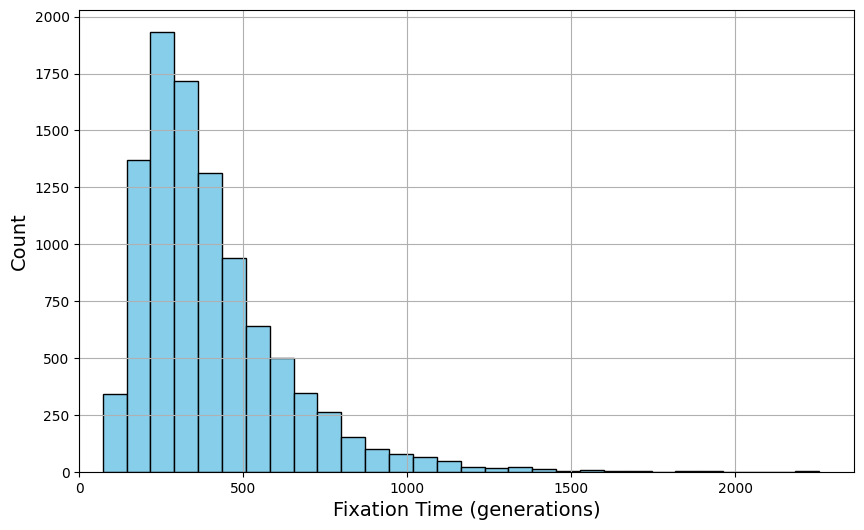

In [16]:
# Plot the histogram of fixation times
# TODO

<h5> Problem 3 </h5>

In lecture we derived the mean heterozygosity at equilibrium:
$$E(2p(1-p))\approx 4N\mu$$
Show that with a population size of 100, the approximation is good for small $\mu$. Find the approximate value of $\mu$ at which the approximation breaks down. Hint: >N generations are required to reach equilibrium.

In [8]:
num_sites = 1_000
population_size = 100
starting_frequency = 1 / population_size
mutation_rate = # TODO
frequency = starting_frequency * np.ones(num_sites)
mean_heterozygosity = []
for mu in mutation_rate:
    # TODO 

print(mean_heterozygosity)
print(4 * np.asarray(mutation_rate) * population_size)

[np.float64(0.00363115), np.float64(0.036424465), np.float64(0.22230487499999999), np.float64(0.444103075), np.float64(0.49301213000000005)]
[4.e-03 4.e-02 4.e-01 4.e+00 4.e+01]


<h5> Problem 4 </h5>

Recall that in population at mutation-drift balance, the site frequency spectrum (SFS) of polymorphic sites is:
$$E(s_k)\propto 1/k$$
where $s_k$ is the number of variants with allele count equal to $k$. Confirm this in simulations by plotting the SFS after a large enough number of generations that equilibrium has been reached. A plotting script has been provided for you. 

In [9]:
num_sites = 100_000
population_size = 100
mutation_rate = 0.00001 # small positive number
num_generations = 1000 # >> population_size
# TODO
allele_frequencies = ...

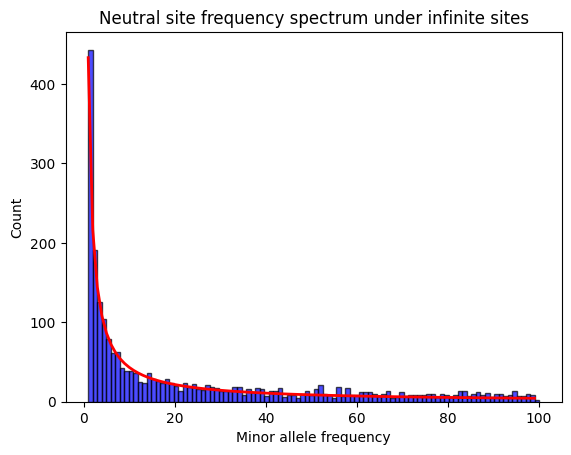

In [10]:
# Histogram of minor allele counts
minor_allele_frequency = np.minimum(allele_frequencies, 1-allele_frequencies)
minor_allele_count_positive = minor_allele_frequency[minor_allele_frequency > 0] * 2 * population_size
plt.figure(figsize=(10, 6))
plt.hist(minor_allele_count_positive, bins=population_size, alpha=0.7, color='blue', edgecolor='black')
 
# Plot y = 1/x
x = np.arange(1,population_size)
y = np.sum(minor_allele_count_positive == 1) / x
plt.plot(x, y, color='red', label='y = 1/x', linewidth=2)

plt.title('Neutral site frequency spectrum under infinite sites')
plt.ylabel('Count')
plt.xlabel('Minor allele frequency')

plt.show()

<h5> Problem 5 </h5>

The number of segregating sites in a population is the number of sites at which any two individuals differ. In a large population, the number of segregating sites grows, and most are rare. Calculate the mean heterozygosity *of segregating sites*, $E(p(1-p)|0<p<1)$, in a population of size $N\in \{10, 100, 1000, 10000\}$, with $0 < \mu << 1/N$. Compare with the mean heterozygosity across all sites. Discuss with your partner: if the mean heterozygosity increases with $N$, why does the mean heterozygosity of segregating sites decrease? (Hint: see optional Problem 6 below).


In [11]:
population_size_array = [10, 100, 1000, 10_000]
mean_heterozygosity_segregating_sites = []
# TODO

{10: np.float64(0.43999999999999995), 100: np.float64(0.17745), 1000: np.float64(0.08813938803680982), 10000: np.float64(0.009512311638163818)}


<h3>Optional problems</h3>

If you finish the problems above early, please work on the following problems with your partner. These are discussion questions, so there is no need to write down your solution; but of course, feel free to use simulations.

<h5>Problem 6</h5>

Discuss with your partner: suppose that in a population of size $N$, with $\mu<<1/N$, you sample $S<N$ haplotypes without replacement and calculate the mean heterozygosity. Will it depend upon $N$, upon $S$, or both? 

<h5>Problem 7</h5>

Discuss with your partner: as the study size $S$ increases, approximately how many segregating sites in total will be observed? What fraction of sites will be singletons? Do these quantities depend on $N$?

<h5>Problem 8</h5>

Next week, we will learn about *demography*, or population history. An important feature of human demography is a rapid increase in population size, over multiple time scales. Discuss with your partner: qualitatively, what influence does recent population expansion have on the SFS? (Hint: with constant population size, what is the average number of alleles that are fixed/lost per generation?)